# analysis

In [1]:
import sys
sys.path.append('..')

In [2]:
# imoports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_61381/1586575780.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# constants

DATA_FILE = '../data/urinalysis_tests.csv'

## Load and Split the data

In [4]:
# load the data

orginal_df = pd.read_csv(DATA_FILE)

In [5]:
# split the data into train and test

df: pd.DataFrame = orginal_df.sample(frac = 0.8, random_state=42)
test_df: pd.DataFrame = orginal_df.drop(df.index)

## First Describe of the data

In [6]:
df.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
594,594,52.0,FEMALE,YELLOW,CLOUDY,NEGATIVE,TRACE,6.5,1.005,>100,1-3,FEW,RARE,NONE SEEN,FEW,NEGATIVE
754,754,4.0,MALE,STRAW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.010,2-4,0-1,RARE,RARE,NONE SEEN,RARE,NEGATIVE
630,630,28.0,FEMALE,YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,6.0,1.025,0-4,0-2,MODERATE,FEW,NONE SEEN,MODERATE,NEGATIVE
1259,1259,7.0,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,0-2,8-10,RARE,FEW,NONE SEEN,RARE,NEGATIVE
903,903,7.0,MALE,STRAW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.005,0-1,0-1,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE


In [7]:
df.describe()

,Unnamed: 0,Age,pH,Specific Gravity
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,706.892080,27.522681,6.054830,1.015827
std,413.195131,23.718993,0.603089,0.007329
min,0.000000,0.010000,5.000000,1.005000
25%,350.000000,6.000000,6.000000,1.010000
50%,704.000000,23.000000,6.000000,1.015000
75%,1061.000000,46.000000,6.500000,1.020000
max,1435.000000,92.000000,8.000000,1.030000


In [8]:
df.count()

Unnamed: 0          1149
Age                 1149
Gender              1149
Color               1148
Transparency        1149
Glucose             1149
Protein             1149
pH                  1149
Specific Gravity    1149
WBC                 1149
RBC                 1149
Epithelial Cells    1149
Mucous Threads      1149
Amorphous Urates    1149
Bacteria            1149
Diagnosis           1149
dtype: int64

## clean the data

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df["Gender"] = df["Gender"].map({'FEMALE': 1, 'MALE': 0})

In [11]:
df = df.dropna(subset=['Color'])

In [12]:
df["Color"].unique().tolist()

['YELLOW',
 'STRAW',
 'DARK YELLOW',
 'LIGHT YELLOW',
 'AMBER',
 'BROWN',
 'REDDISH YELLOW',
 'REDDISH',
 'RED',
 'LIGHT RED']

In [13]:
df_normal = df.copy()

### stop be normal

In [14]:
colors = df["Color"].unique().tolist()
for color in colors:
    df[color.lower()] = df["Color"] == color

In [15]:
df.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,...,yellow,straw,dark yellow,light yellow,amber,brown,reddish yellow,reddish,red,light red
594,52.0,1,YELLOW,CLOUDY,NEGATIVE,TRACE,6.5,1.005,>100,1-3,...,True,False,False,False,False,False,False,False,False,False
754,4.0,0,STRAW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.010,2-4,0-1,...,False,True,False,False,False,False,False,False,False,False
630,28.0,1,YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,6.0,1.025,0-4,0-2,...,True,False,False,False,False,False,False,False,False,False
1259,7.0,0,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,0-2,8-10,...,True,False,False,False,False,False,False,False,False,False
903,7.0,0,STRAW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.005,0-1,0-1,...,False,True,False,False,False,False,False,False,False,False


In [16]:
transparency = ["CLEAR", "SLIGHTLY HAZY", "HAZY", "CLOUDY", "TURBID"]

df["transparency_id"] = df["Transparency"].map({value: i for i, value in enumerate(transparency)})
df["transparency_name"] = df["Transparency"].apply(lambda x: x.lower())

df = df.drop('Transparency', axis=1)

In [17]:
df.head()

,Age,Gender,Color,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,...,dark yellow,light yellow,amber,brown,reddish yellow,reddish,red,light red,transparency_id,transparency_name
594,52.0,1,YELLOW,NEGATIVE,TRACE,6.5,1.005,>100,1-3,FEW,...,False,False,False,False,False,False,False,False,3,cloudy
754,4.0,0,STRAW,NEGATIVE,NEGATIVE,6.0,1.010,2-4,0-1,RARE,...,False,False,False,False,False,False,False,False,0,clear
630,28.0,1,YELLOW,NEGATIVE,TRACE,6.0,1.025,0-4,0-2,MODERATE,...,False,False,False,False,False,False,False,False,1,slightly hazy
1259,7.0,0,YELLOW,NEGATIVE,NEGATIVE,6.0,1.015,0-2,8-10,RARE,...,False,False,False,False,False,False,False,False,0,clear
903,7.0,0,STRAW,NEGATIVE,NEGATIVE,6.5,1.005,0-1,0-1,RARE,...,False,False,False,False,False,False,False,False,0,clear


In [18]:
df["glucose-name"] = df["Glucose"].apply(lambda x: x.lower())
df["glucose-id"] = df["Glucose"].map({'NEGATIVE': 0, 'TRACE': 1, '1+': 2, '2+': 3, '3+': 4, '4+': 5})

df = df.drop('Glucose', axis=1)

In [19]:
df["protein-name"] = df["Protein"].apply(lambda x: x.lower())
df["protein-id"] = df["Protein"].map({'NEGATIVE': 0, 'TRACE': 1, '1+': 2, '2+': 3, '3+': 4})

df = df.drop('Protein', axis=1)

In [20]:
df.head()

,Age,Gender,Color,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,...,reddish yellow,reddish,red,light red,transparency_id,transparency_name,glucose-name,glucose-id,protein-name,protein-id
594,52.0,1,YELLOW,6.5,1.005,>100,1-3,FEW,RARE,NONE SEEN,...,False,False,False,False,3,cloudy,negative,0,trace,1
754,4.0,0,STRAW,6.0,1.010,2-4,0-1,RARE,RARE,NONE SEEN,...,False,False,False,False,0,clear,negative,0,negative,0
630,28.0,1,YELLOW,6.0,1.025,0-4,0-2,MODERATE,FEW,NONE SEEN,...,False,False,False,False,1,slightly hazy,negative,0,trace,1
1259,7.0,0,YELLOW,6.0,1.015,0-2,8-10,RARE,FEW,NONE SEEN,...,False,False,False,False,0,clear,negative,0,negative,0
903,7.0,0,STRAW,6.5,1.005,0-1,0-1,RARE,NONE SEEN,NONE SEEN,...,False,False,False,False,0,clear,negative,0,negative,0


In [21]:
df["wbc-name"] = df["WBC"].apply(lambda x: x.lower())
df["wbc-a"] = df["WBC"].apply(lambda x: x.split('-')[0] if '-' in x else x.lower())
df["wbc-b"] = df["WBC"].apply(lambda x: x.split('-')[1] if '-' in x else x.lower())

df = df.drop('WBC', axis=1)

In [22]:
df["rbc-name"] = df["RBC"].apply(lambda x: x.lower())
df["rbc-a"] = df["RBC"].apply(lambda x: x.split('-')[0] if '-' in x else x.lower())
df["rbc-b"] = df["RBC"].apply(lambda x: x.split('-')[1] if '-' in x else x.lower())

df = df.drop('RBC', axis=1)

In [23]:
for column in ["Epithelial Cells", "Mucous Threads", "Amorphous Urates", "Bacteria"]:
    df[column] = df[column].map({'NONE SEEN': 0, 'RARE': 1, 'FEW': 2, 'OCCASIONAL': 3, 'MODERATE': 4, 'PLENTY': 5, 'LOADED': 6})

In [24]:
df["Diagnosis"] = df["Diagnosis"].map({'NEGATIVE': 0, 'POSITIVE': 1})

In [25]:
df

,Age,Gender,Color,pH,Specific Gravity,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis,...,glucose-name,glucose-id,protein-name,protein-id,wbc-name,wbc-a,wbc-b,rbc-name,rbc-a,rbc-b
594,52.0,1,YELLOW,6.5,1.005,2,1,0,2,0,...,negative,0,trace,1,>100,>100,>100,1-3,1,3
754,4.0,0,STRAW,6.0,1.010,1,1,0,1,0,...,negative,0,negative,0,2-4,2,4,0-1,0,1
630,28.0,1,YELLOW,6.0,1.025,4,2,0,4,0,...,negative,0,trace,1,0-4,0,4,0-2,0,2
1259,7.0,0,YELLOW,6.0,1.015,1,2,0,1,0,...,negative,0,negative,0,0-2,0,2,8-10,8,10
903,7.0,0,STRAW,6.5,1.005,1,0,0,1,0,...,negative,0,negative,0,0-1,0,1,0-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,1,STRAW,6.0,1.005,3,3,0,2,0,...,negative,0,trace,1,loaded,loaded,loaded,1-3,1,3
157,18.0,1,LIGHT YELLOW,6.5,1.005,5,0,0,2,0,...,negative,0,negative,0,10-12,10,12,0-2,0,2
16,32.0,1,LIGHT YELLOW,6.5,1.015,2,0,5,1,0,...,negative,0,trace,1,6-8,6,8,0-2,0,2
1072,89.0,1,YELLOW,6.0,1.015,1,1,0,1,0,...,negative,0,trace,1,2-4,2,4,0-2,0,2


## Show

Text(0.5, 1.0, 'NEGATIVE / POSITIVE')

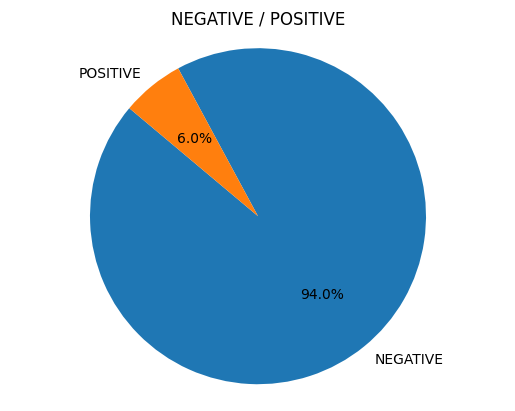

In [26]:
labels = ['NEGATIVE', 'POSITIVE']
sizes = [(df["Diagnosis"] == 0).sum(), (df["Diagnosis"] == 1).sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# Add a title
plt.title('NEGATIVE / POSITIVE')

Text(0.5, 1.0, 'Male / Fmale')

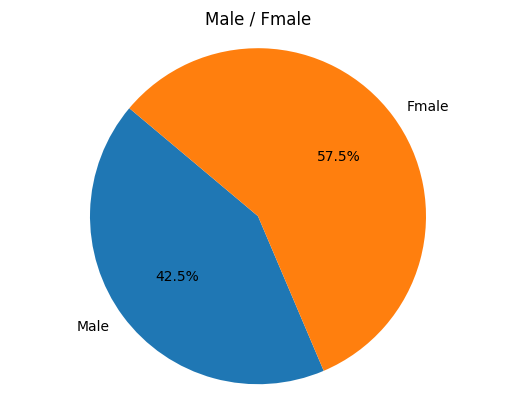

In [27]:
labels = ['Male', 'Fmale']
sizes = [(df["Gender"] == 0).sum(), (df["Gender"] == 1).sum()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# Add a title
plt.title('Male / Fmale')

Text(0.5, 1.0, 'Samples per Ages')

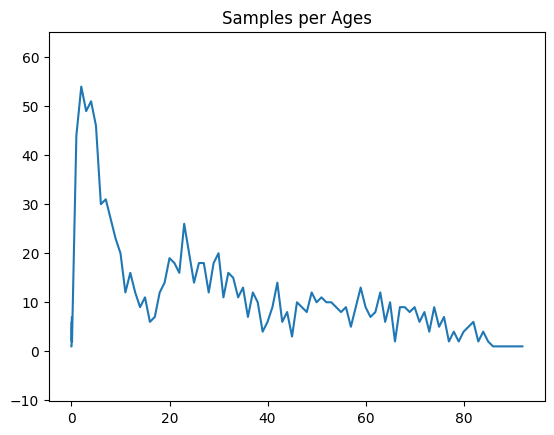

In [28]:
labels = list(sorted(df["Age"].unique().tolist()))
sizes = [(df["Age"] == age).sum() for age in labels]

plt.plot(labels, sizes)
plt.axis('equal')

# Add a title
plt.title('Samples per Ages')

Text(0.5, 1.0, 'Correlation Matrix')

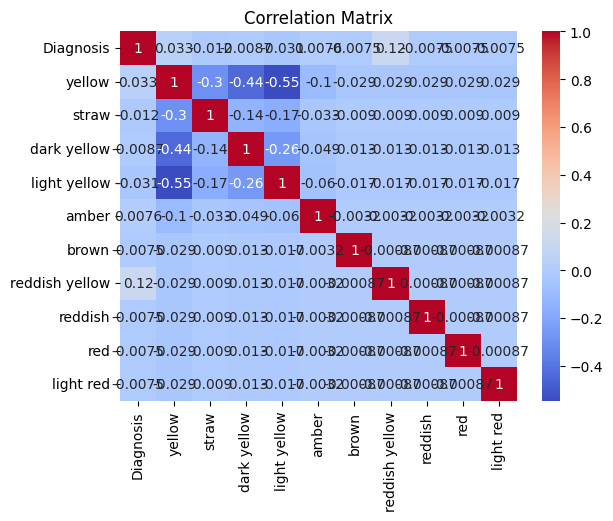

In [31]:
colors = df["Color"].apply(lambda x: x.lower()).unique().tolist()
df_color = df[["Diagnosis"] + colors]

sns.heatmap(df_color.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [35]:
df_color.corr()["Diagnosis"].sort_values()

light yellow     -0.031255
straw            -0.011676
dark yellow      -0.008738
light red        -0.007467
red              -0.007467
brown            -0.007467
reddish          -0.007467
amber             0.007573
yellow            0.033158
reddish yellow    0.116763
Diagnosis         1.000000
Name: Diagnosis, dtype: float64